In [221]:
%run functions
%matplotlib inline

# Play against the net

In [243]:
# Load the weights of the trained net
# w = np.genfromtxt('Forza.csv')
ckpt = tf.train.get_checkpoint_state('')
saver.restore(sess, ckpt.model_checkpoint_path)

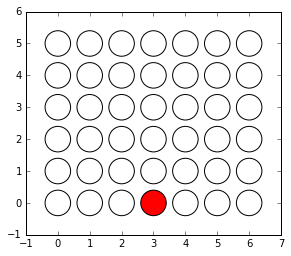

In [244]:
# Let the net make the first move
board = NewTable()
move  = ResponseTF(board,x,y2,sess, keep_prob)
board, ok = DropIn(board, move, 1)
DrawBoard(board)

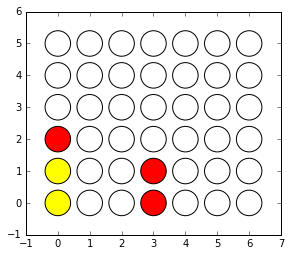

In [246]:
# You move, then the net will respond

YOUR_MOVE = 0

board, ok = DropIn(board, YOUR_MOVE, 2)

move  = ResponseTF(board,x,y2,sess, keep_prob)
board, ok = DropIn(board, move, 1)

AnnounceWinner(board)
DrawBoard(board)

<br/><br/><br/><br/><br/><br/>
___

# Train a simple net with Tensor Flow

In [28]:
import tensorflow as tf

### Load the training set

In [84]:
X = np.genfromtxt('Train_X.csv')
Y = np.genfromtxt('Train_Y.csv')

### Define the Model

In [85]:
x  = tf.placeholder(tf.float32, [None, INPUT])
W  = tf.Variable(tf.zeros([INPUT, COLS]))
b  = tf.Variable(tf.zeros([COLS]))

y  = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, COLS])

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

### Initialize the training session

In [88]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

### Train the net

In [89]:
%%time
N = 200
for i in range(1000):
    train_X, train_Y = RandomTrain(X,Y,N)
    sess.run(train_step, feed_dict={x: train_X, y_: train_Y})

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(sess.run(accuracy, feed_dict={x: X, y_: Y}))

w = W.eval(sess).T

0.6249
CPU times: user 3.94 s, sys: 132 ms, total: 4.07 s
Wall time: 3.8 s


### Save the weights

In [383]:
np.savetxt("Forza_new.csv", w, delimiter=",")

<br/><br/><br/><br/><br/><br/>
___

### Generate a training set

In [72]:
%%time
train = []

for i in range(0,10):
    board, moves, x = RandomMatch2(w1=w)
    if x > 1: train.append([board, moves].copy())
        
print(len(train))

0
CPU times: user 75.8 ms, sys: 1.15 ms, total: 76.9 ms
Wall time: 78.7 ms


/Users/abramo/Forza-Quattro/functions.py:187: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if w1!=None:


In [29]:
X = np.array([ Input(board)         for (board, moves) in train ])
Y = np.array([ HotVector(moves[-1]) for (board, moves) in train ])

#np.savetxt('Train_X.csv', X)
#np.savetxt('Train_Y.csv', Y)

# Going Deeper

In [123]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [182]:
# Input Layer
x   = tf.placeholder(tf.float32, [None, INPUT])
W1  = weight_variable([INPUT, INPUT])
b1  = bias_variable([INPUT])

# Hidden Layer
h1  = tf.nn.softmax(tf.matmul(x, W1) + b1)
h1_ = tf.placeholder(tf.float32, [None, INPUT])

# Dropout
keep_prob  = tf.placeholder(tf.float32)
h1_drop    = tf.nn.dropout(h1, keep_prob)
h1_drop_   = tf.placeholder(tf.float32, [None, INPUT])

W2  = weight_variable([INPUT, COLS])
b2  = bias_variable([COLS])

# Output Layer
y2  = tf.nn.softmax(tf.matmul(h1_drop, W2) + b2)
y2_ = tf.placeholder(tf.float32, [None, COLS])

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y2_ * tf.log(y2), reduction_indices=[1]))
train_step    = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

In [198]:
%%time
N = 50
correct_prediction = tf.equal(tf.argmax(y2,1), tf.argmax(y2_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

for i in range(300001):
    train_X, train_Y = RandomTrain(X,Y,N)
    sess.run(train_step, feed_dict={x: train_X, y2_: train_Y, keep_prob: 0.5})
   
    if i%10000==0: 
        train_accuracy = accuracy.eval(session=sess, feed_dict={x:X, y2_:Y, keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
    
    #print(sess.run(accuracy, feed_dict={x: X, y2_: Y, keep_prob: 1.0}))

w = W.eval(sess).T

step 0, training accuracy 0.7169
step 10000, training accuracy 0.7212
step 20000, training accuracy 0.7226
step 30000, training accuracy 0.7291
step 40000, training accuracy 0.7308
step 50000, training accuracy 0.7341
step 60000, training accuracy 0.7371
step 70000, training accuracy 0.7383
step 80000, training accuracy 0.7417
step 90000, training accuracy 0.7451
step 100000, training accuracy 0.7469
step 110000, training accuracy 0.7487
step 120000, training accuracy 0.7484
step 130000, training accuracy 0.752
step 140000, training accuracy 0.7523
step 150000, training accuracy 0.7541
step 160000, training accuracy 0.7546
step 170000, training accuracy 0.7565
step 180000, training accuracy 0.7573
step 190000, training accuracy 0.7602
step 200000, training accuracy 0.7614
step 210000, training accuracy 0.7623
step 220000, training accuracy 0.7632
step 230000, training accuracy 0.7648
step 240000, training accuracy 0.7669
step 250000, training accuracy 0.7669
step 260000, training accur

In [236]:
saver = tf.train.Saver()
saver.save(sess, 'model.ckpt', global_step=i+1)